In [27]:
!pip uninstall qiskit qiskit-aer qiskit-ibm-runtime

Found existing installation: qiskit 2.0.2
Uninstalling qiskit-2.0.2:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/qiskit-2.0.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/qiskit/*
Proceed (Y/n)? Y
  Successfully uninstalled qiskit-2.0.2
Found existing installation: qiskit-aer 0.17.0
Uninstalling qiskit-aer-0.17.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/qiskit_aer-0.17.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/qiskit_aer.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.11/dist-packages/qiskit_aer.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/qiskit_aer.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.11/dist-packages/qiskit_aer.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/qiskit_aer/*
Proceed (Y/n)? Y
  Successfully uninstalled qiskit-aer-0.17.0
Found existing installation: qiskit-ibm-runtime 0.40.0
Uninstalling qiskit-ibm-runtime-0.40

In [28]:
!pip install qiskit qiskit-aer qiskit-ibm-runtime

  Using cached qiskit-2.0.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_aer-0.17.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.2 kB)
  Using cached qiskit_ibm_runtime-0.40.0-py3-none-any.whl.metadata (21 kB)
Using cached qiskit-2.0.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
Using cached qiskit_aer-0.17.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
Using cached qiskit_ibm_runtime-0.40.0-py3-none-any.whl (3.2 MB)


In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from math import pi
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Sampler

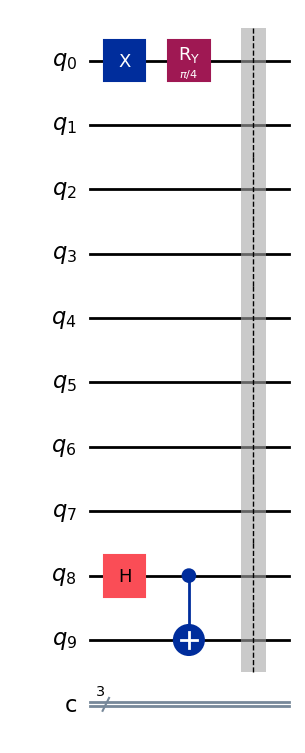

In [15]:
circ = QuantumCircuit(10, 3)
circ.x(0)
circ.ry(pi/4, 0)

circ.h(8)
circ.cx(8, 9)
circ.barrier()

circ.draw('mpl')

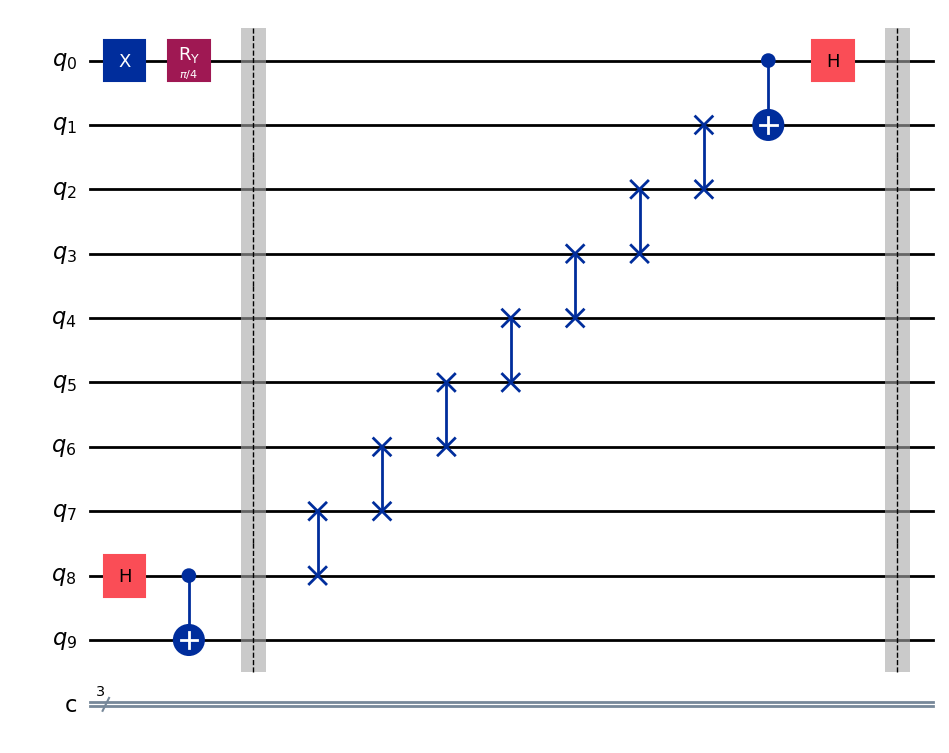

In [16]:
circ.swap([8, 7, 6, 5, 4, 3, 2], [7, 6, 5, 4, 3, 2, 1])

circ.cx(0, 1)
circ.h(0)
circ.barrier()

circ.draw('mpl')

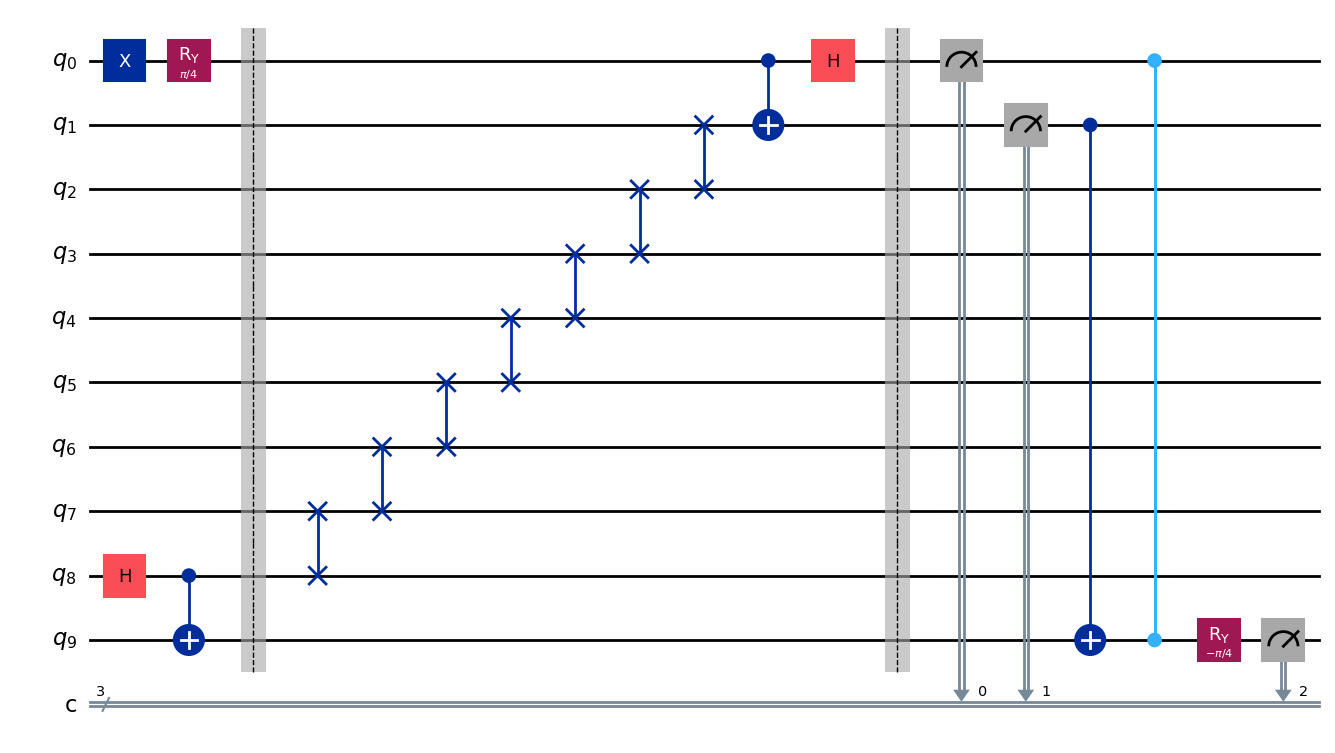

In [17]:
circ.measure([0, 1], [0, 1])
circ.cx(1, 9)
circ.cz(0, 9)
circ.ry(pi/4, 9).inverse()
circ.measure([9], [2])

circ.draw('mpl')

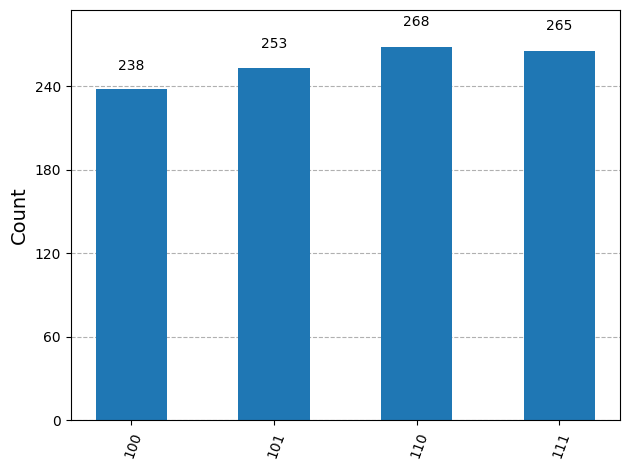

In [18]:
simulator = Aer.get_backend('qasm_simulator')
transpiled_circ = transpile(circ, simulator)
job = simulator.run(transpiled_circ)
result = job.result()
plot_histogram(result.get_counts())

In [19]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token= "1d33c48c70bad9809b8ef3e65d4a2aba3223f3f2bab19d80d0b7658bee149e3455a3618e738e8f35ce84308d33e2b631c92efddcb0a4a02d05108d149784855a" #your APT Key under quotes ""
                                  , overwrite=True)
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, min_num_qubits=3)
transpiled_circuit = transpile(circ, backend)
job = Sampler(backend).run([transpiled_circuit], shots = 3000) #4) Job Submission
result = job.result()

print(f"Backend name: {backend.name}, Job ID: {job.job_id()}") #5) This prints the backend used name and the Job ID

<ipython-input-19-d08f3a421aa4>:3: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


Backend name: ibm_brisbane, Job ID: d0xgsc54mb60008y8ktg


{'000': 46, '010': 179, '101': 707, '110': 625, '111': 576, '011': 159, '100': 657, '001': 51}


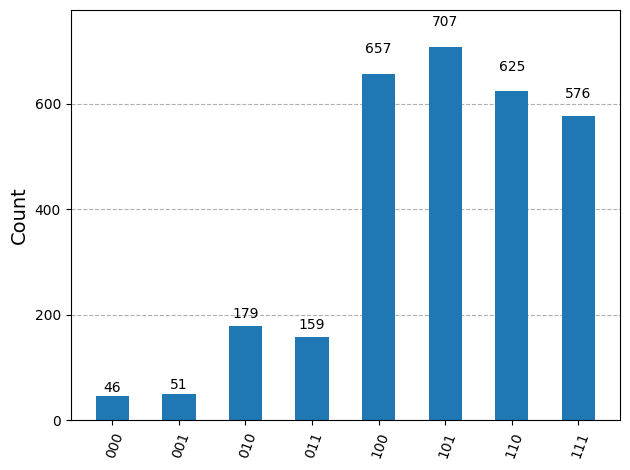

In [20]:
bit_array = list(result[0].data.values())[0]
counts = bit_array.get_counts()
print(counts)
plot_histogram(counts)